# Scrapping and creating a dataset of skateboards

scraped on https://www.deckslog.com/skateboard/

In [2]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import requests 
import shutil 
import os

In [3]:
import sys
sys.setrecursionlimit(100000)

In [4]:
page = 1
url = f'https://www.deckslog.com/skateboard/page/{page}/'

In [5]:
# This is where we do an HTTP request to get the HTML from the website
response = requests.get(url)

# And this is where we feed that HTML to the parser
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
boards_html = soup.find_all("div", class_="card")

## Parsing _one_ board

In [7]:
boards_html[0]

<div class="card"><div class="card-media"> <a href="https://www.deckslog.com/skateboard/skate-mental-alien-vs-predator-night-8-4/"> <img alt="Skate Mental'" class="card-img-top" src="https://www.deckslog.com/wp-content/uploads/2022/12/SkateMentalAlienVsPredatorNightDeckcopy.jpg"/> </a></div><div class="card-body"><h3 class="card-title"> Skate Mental / AlienVs Predator Night</h3><div class="card-text meta-info"><div class="lineitem lineitem_company"><div class="label">Company:</div><div class="content"><span>Skate Mental</span></div></div><div class="lineitem lineitem_artist"><div class="label">Artist:</div><div class="content"><span></span></div></div><div class="lineitem lineitem_year"><div class="label">Released:</div><div class="content"><span></span></div></div></div></div></div>

In [8]:
board_title=boards_html[0].find('h3', class_="card-title").string
board_company=boards_html[0].find('div', class_="lineitem lineitem_company").find('div', class_='content').find('span').string
board_image_hyperlink=boards_html[0].find('div', class_="card-media").find('img').attrs['src']
board_artist=boards_html[0].find('div', class_="lineitem lineitem_artist").find('div', class_='content').find('span').string
board_year=boards_html[0].find('div', class_="lineitem lineitem_year").find('div', class_='content').find('span').string
board_title,board_company,board_year,board_artist,board_image_hyperlink

(' Skate Mental / AlienVs Predator Night',
 'Skate Mental',
 None,
 None,
 'https://www.deckslog.com/wp-content/uploads/2022/12/SkateMentalAlienVsPredatorNightDeckcopy.jpg')

In [57]:
url = board_image_hyperlink
file_name = f"{os.path.abspath('raw_data')}/{board_image_hyperlink.split('/')[-1]}"

res = requests.get(url, stream = True)

if res.status_code == 200:
    with open(file_name,'wb') as f:
        shutil.copyfileobj(res.raw, f)
    print('Image sucessfully Downloaded: ',file_name)
else:
    print('Image Couldn\'t be retrieved')

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateMentalAlienVsPredatorNightDeckcopy.jpg


In [54]:
board_image_path=f"{os.path.abspath('raw_data')}/{board_image_hyperlink.split('/')[-1]}"
board_image_path

'/Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateMentalAlienVsPredatorNightDeckcopy.jpg'

## Parsing _all_ boards

In [9]:
boards_dict = { 'Title': [], 'Company': [], 'Image_hyperlink': [], 'Artist': [], 'Year': [], 'Image_path': []}

In [56]:
def download_image(board_image_hyperlink):
    url = board_image_hyperlink
    file_name = f"{os.path.abspath('raw_data')}/{board_image_hyperlink.split('/')[-1]}"

    res = requests.get(url, stream = True)

    if res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(res.raw, f)
        print('Image sucessfully Downloaded: ',file_name)
        return 0
    else:
        print('Image Couldn\'t be retrieved')
        return 404

In [10]:
for i in range(1,196):
    
    page = i
    url = f'https://www.deckslog.com/skateboard/page/{page}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    boards_html = soup.find_all("div", class_="card")
    print(f'{i}/195')

    for board in boards_html:
        board_title=board.find('h3', class_="card-title").string
        board_company=board.find('div', class_="lineitem lineitem_company").find('div', class_='content').find('span').string
        board_artist=board.find('div', class_="lineitem lineitem_artist").find('div', class_='content').find('span').string
        board_year=board.find('div', class_="lineitem lineitem_year").find('div', class_='content').find('span').string
        
        if board.find('div', class_="card-media") is not None:
            board_image_hyperlink=board.find('div', class_="card-media").find('img').attrs['src']
            board_image_path=f"{os.path.abspath('raw_data')}/{board_image_hyperlink.split('/')[-1]}"
            #download_image(board_image_hyperlink)
        
        else:
            board_image_hyperlink= None
            board_image_path= None
        
        boards_dict['Title'].append(board_title)
        boards_dict['Company'].append(board_company)
        boards_dict['Image_hyperlink'].append(board_image_hyperlink)
        boards_dict['Image_path'].append(board_image_path)
        boards_dict['Artist'].append(board_artist)
        boards_dict['Year'].append(board_year)
        

boards_dict

1/195
2/195
3/195
4/195
5/195
6/195
7/195
8/195
9/195
10/195
11/195
12/195
13/195
14/195
15/195
16/195
17/195
18/195
19/195
20/195
21/195
22/195
23/195
24/195
25/195
26/195
27/195
28/195
29/195
30/195
31/195
32/195
33/195
34/195
35/195
36/195
37/195
38/195
39/195
40/195
41/195
42/195
43/195
44/195
45/195
46/195
47/195
48/195
49/195
50/195
51/195
52/195
53/195
54/195
55/195
56/195
57/195
58/195
59/195
60/195
61/195
62/195
63/195
64/195
65/195
66/195
67/195
68/195
69/195
70/195
71/195
72/195
73/195
74/195
75/195
76/195
77/195
78/195
79/195
80/195
81/195
82/195
83/195
84/195
85/195
86/195
87/195
88/195
89/195
90/195
91/195
92/195
93/195
94/195
95/195
96/195
97/195
98/195
99/195
100/195
101/195
102/195
103/195
104/195
105/195
106/195
107/195
108/195
109/195
110/195
111/195
112/195
113/195
114/195
115/195
116/195
117/195
118/195
119/195
120/195
121/195
122/195
123/195
124/195
125/195
126/195
127/195
128/195
129/195
130/195
131/195
132/195
133/195
134/195
135/195
136/195
137/195
138/195
139/

{'Title': [' Skate Mental / AlienVs Predator Night',
  ' Skate / Mental Vs Predator Day 8.28',
  ' Alien Workshop / Debut Decks Blue',
  ' Antihero / Classic Eagle Orange',
  ' Antihero / Classic Eagle Larger',
  ' Antihero / Classic Eagle Blue',
  ' Antihero / Classic Eagle Black',
  ' World Industries / Flameboy vs Wet Willy',
  ' StrangeLove / Side effect / remote killer',
  ' StrangeLove / Punk Ghoul Purple Stain',
  ' Anti Hero / Hooters Tramp Stamp',
  ' / Hatsune- Miku',
  ' Madrid / Jester',
  ' Vision / Frankenstein',
  ' Toy Machine / Cut Ups',
  ' Toy Machine / Monster',
  ' Toy Machine / Fists',
  ' Toy Machine / Robot',
  ' Flip / Team Deck',
  ' Flip / Geoff Rowley',
  ' Eurocana / Per Welinder',
  ' Powell Peralta / Ray "Bones"Rodriguez',
  ' Powell Peralta / Ray "Bones" Rodriguez',
  ' Powell Peralta / Steve Caballero',
  ' Variflex / Lance Mountain',
  ' Powell Peralta / Alan Gelfand',
  ' Powell Peralta / Jay Smith',
  ' Powell Peralta / Rodney Mullen',
  ' Powell Per

## Loading data in Pandas

In [11]:
boards_df = pd.DataFrame.from_dict(boards_dict)
boards_df

,Title,Company,Image_hyperlink,Artist,Year,Image_path
0,Skate Mental / AlienVs Predator Night,Skate Mental,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
1,Skate / Mental Vs Predator Day 8.28,Skate,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2,Alien Workshop / Debut Decks Blue,Alien Workshop,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
3,Antihero / Classic Eagle Orange,Antihero,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
4,Antihero / Classic Eagle Larger,Antihero,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
...,...,...,...,...,...,...
2329,Death / Og Skull Black,Death,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2330,Death / Og Skull White,Death,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2331,Antihero / Shaped Eagle Green Giant,Antihero,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2332,Antihero / Shaped Eagle Blue Meanie,Antihero,https://www.deckslog.com/wp-content/uploads/20...,None,None,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...


## Saving the dataframe as csv file

In [12]:
boards_df.to_csv('raw_data/boards_df.csv')  

## First visualizations of the dataset

<AxesSubplot: xlabel='Year'>

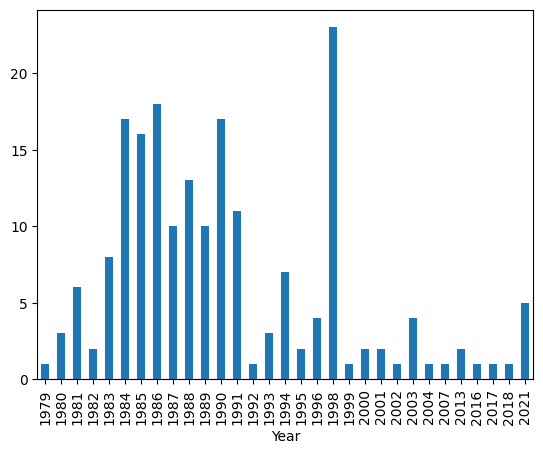

In [13]:
boards_df.groupby("Year").count()["Title"].plot(kind="bar")

<AxesSubplot: xlabel='Company'>

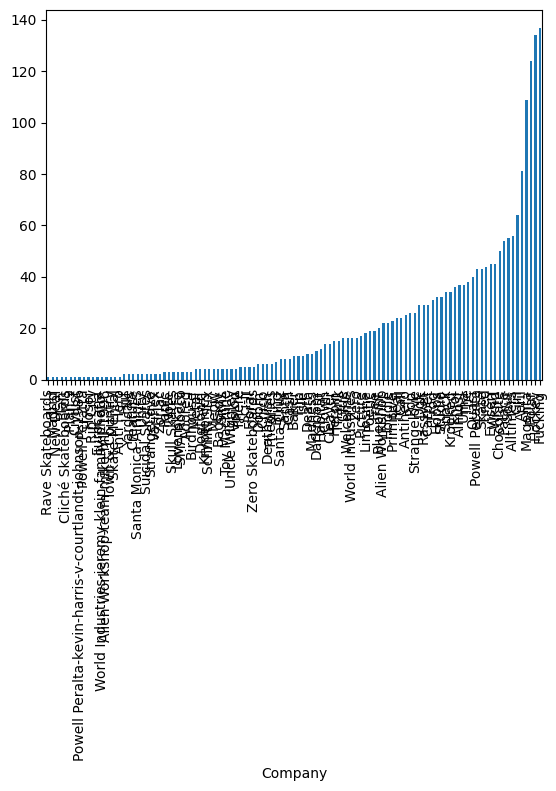

In [23]:
boards_df.groupby("Company").count().sort_values(by=["Title"])["Title"].plot(kind="bar")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


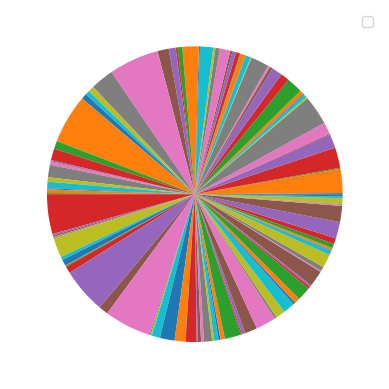

In [71]:
plt.pie(boards_df.groupby("Company").count()["Title"], normalize = True)
plt.legend() 